In [29]:
import math   ## importing the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
n = int(input('degree of the polynomial to be fitted: ')) # enter the degree of the polynomial that you want to fit

degree of the polynomial to be fitted: 3


In [31]:
x= [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
    0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
y= [0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 1.191, 1.124,1.095,
    1.122, 1.102, 1.099, 1.017, 1.111, 1.117, 1.152, 1.265, 1.38, 1.575, 1.857]

In [32]:
N= len(x) # calculate the number of points taken
print(N)

21


In [33]:
sum_list=[]
Y_list=[]
for i in range (2*n+1):
    sum=0
    Y=0
    for j in x:
        sum+= j**i
    for k in range (0,N):
        Y+= (x[k]**i)*y[k]
    sum_list.append(sum) # list whose elements are sum(i), sum(xi), sum(xi^2),...soon
    Y_list.append(Y) # list whose elements are sum(yi), sum(xiyi), sum(xi^2*yi),....soon
    
print(sum_list)
print(Y_list)

[21.0, 10.499999999999998, 7.174999999999999, 5.5125, 4.516662500000001, 3.85415625, 3.3821220312499998]
[24.118000000000002, 13.234499999999997, 9.468365, 7.5594405, 6.4007078375, 5.6175627937499995, 5.04987759884375]


In [34]:
matM =np.zeros((n+1,n+1))
matY =np.zeros(n+1)
matA = np.zeros(n+1)

In [35]:
for i in range(n+1):
    for j in range(n+1):
        matM[i][j] = sum_list[j+i]
print(matM) # matrix of M in MA=Y form of equation (matrix of xis)

[[21.         10.5         7.175       5.5125    ]
 [10.5         7.175       5.5125      4.5166625 ]
 [ 7.175       5.5125      4.5166625   3.85415625]
 [ 5.5125      4.5166625   3.85415625  3.38212203]]


In [36]:
for i in range(n+1):
    matY[i]=Y_list[i]
print(matY) # matrix on R.H.S. of the equation

[24.118     13.2345     9.468365   7.5594405]


In [37]:
# program for LU decomposition
lowerM=np.zeros((n+1,n+1))
upperM=np.zeros((n+1,n+1))
P=np.zeros(n+1)
for i in range(n+1):
    for j in range(i,n+1):
        sum = 0;
        for k in range (i):
            sum+=(lowerM[i][k])*(upperM[k][j]);
        upperM[i][j]=matM[i][j]-sum;
    for j in range(i,n+1):
        if(i==j):
            lowerM[i][i]=1;
        else:
            sum = 0
            for k in range (i):
                sum+=(lowerM[j][k])*(upperM[k][i]);
            lowerM[j][i]=(matM[j][i]-sum)/upperM[i][i];
            
print(lowerM)
print(upperM)
            

[[1.         0.         0.         0.        ]
 [0.5        1.         0.         0.        ]
 [0.34166667 1.         1.         0.        ]
 [0.2625     0.9145     1.5        1.        ]]
[[2.10000000e+01 1.05000000e+01 7.17500000e+00 5.51250000e+00]
 [0.00000000e+00 1.92500000e+00 1.92500000e+00 1.76041250e+00]
 [0.00000000e+00 0.00000000e+00 1.40204167e-01 2.10306250e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.73417500e-03]]


In [38]:
for i in range (n+1):
    P[i]=matY[i]/lowerM[i][i];      
    for j in range(0,i):
        P[i]=P[i]-(lowerM[i][j]*P[j])/lowerM[i][i];
print(P)

[24.118       1.1755      0.05254833  0.07464825]


In [39]:
for i in range (n,-1,-1):
    matA[i]=P[i]/upperM[i][i];
    for j in range (i+1, n+1):
        matA[i]=matA[i]-(upperM[i][j]*matA[j])/upperM[i][i];
print(matA)  ## final matrix obtained after LU decom. and substitution, it's elements are the required coefficients

[  0.57465867   4.72586144 -11.12821778   7.66867762]


In [40]:
delx=(x[-1] - x[0])/100
delx1=x[0]
X=[delx1]
for i in range (0,100,1):
    delx1+=delx
    X.append(delx1)
funcvalues=[]
for xi in X:
    funcvalue=0
    for i in range (0,n+1):
         funcvalue+= matA[i]*(xi**i)
    funcvalues.append(funcvalue) ## funcvalues have values of best fit curve of nth degree

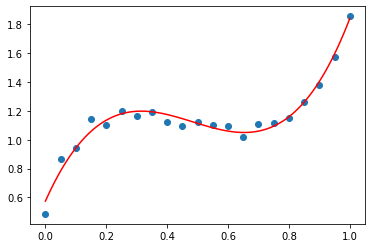

In [41]:
plt.plot(x, y, 'o') # plots the points
plt.plot(X, funcvalues, 'r')# plots the best fit curve